# This notebook can be used to generate markowitz curves in various dimensions
- You can provide your custom mean returns and covariance matrix or use a randomly generated 
- The plot is generated using a monte-carlo simulation

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
dimesion = int(input("Enter the dimesion of the hyperspace/ number of assets :"))
mean_return = np.array([float(i) for i in input("Enter the mean return of the assets :").split()])
covariance = np.array([[float(i) for i in input("Enter the covariance matrix :").split()] for j in range(dimesion)])

In [76]:
#Random setting
matrixSize = int(input("Enter the dimesion of the hyperspace/ number of assets :"))
dimesion = matrixSize
A = np.random.uniform(-4,4,(matrixSize, matrixSize))
covariance = np.dot(A, A.transpose())
mean_return = np.random.rand(matrixSize)
mean_return = np.sort(mean_return)


In [8]:
# 4- asset example 
covariance = np.array([[ 2. ,  0.5,  0.3, -0.6],
       [ 0.5,  2.5 , -0.2,  0.4],
       [ 0.3, -0.2,  3. , -0.9],
       [-0.6,  0.4, -0.9,  4.5]])

mean_return = np.array([ 0.3,  0.5,  0.67,  0.879])
dimesion = 4
markowitz_iterations = int(3*1e5)

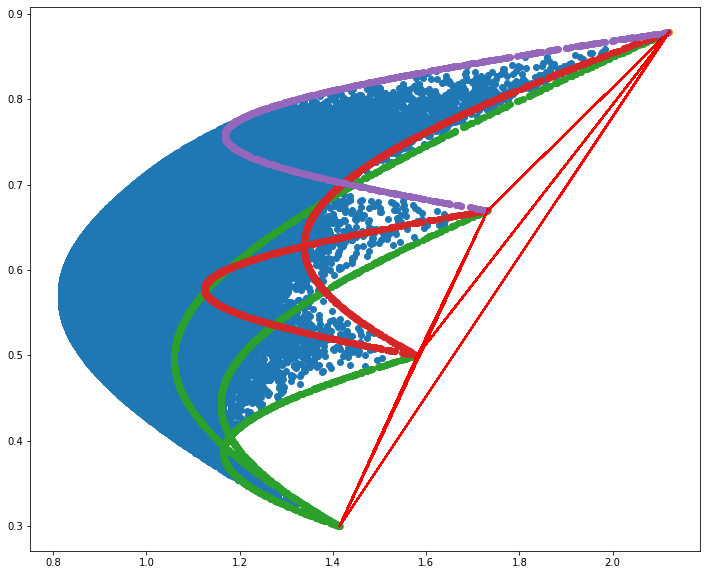

In [12]:
plt.figure(figsize=(12,10))
mu, sigma = [], []
for i in range(markowitz_iterations):
    # Monte carlo simulation
    w = np.random.rand(dimesion)
    w = w/sum(w)
    mu.append(np.dot(w, mean_return))
    sigma.append(np.sqrt(np.dot(np.dot(w, covariance), w)))
plt.scatter(sigma, mu)
plt.scatter([np.sqrt(covariance[i][i]) for i in range(dimesion)], mean_return)
for i in range(dimesion):
    mu_temp, sigma_temp = [], []
    for j in range(i+1, dimesion):
        for k in range(1000):
            w = np.random.rand(2)
            w = w/sum(w)
            mu_temp.append(np.dot(w, mean_return[[i,j]]))
            sigma_temp.append(np.sqrt(np.dot(np.dot(w, covariance[[i,j]][:,[i,j]]), w)))
            plt.plot([np.sqrt(covariance[i][i]), np.sqrt(covariance[j][j])], [mean_return[i], mean_return[j]], color='r')
    plt.scatter(sigma_temp, mu_temp)

In [3]:
import numpy as np
c_inv  = np.linalg.inv(np.array([[0.25*0.25,0.021,0.0075],
                        [0.021,0.28*0.28,0.0056],
                        [0.075,0.0224,0.04]]))

In [4]:
e = np.ones(3).T
e

array([1., 1., 1.])

In [8]:
(e @ c_inv) /   T)

array([-1.16606827,  0.59584871,  1.57021956])